# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

В данных представлена следующая информация:

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_heigh* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

**Задачи:**
1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков.
2. Изучить время продажи квартиры.
3. Изучить, как зависит цена от площади, числа комнат, удалённости от центра, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года. Определить, какие факторы больше всего влияют на стоимость квартиры? 
4. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
5. Изучить зависимость цены от удаленности от центра Санкт-Петербурга. Определить границу центральной зоны.
6. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры.

## 1. Загрузка данных. Общая информация 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В таблице 23699 строк и 22 столбца. Названия столбцов правильные (латиницей в нижнем регистре, без пробелов), подходят для удобной работы. В данных встречаются пропуски, которые требуют обработки.

## 2. Предобработка данных

### Обработка пропусков

Исследуем пропущенные значения в каждом столбце поочереди.

Первый столбец с пропусками - "Высота потолка". Пропуски в данном столбце невозможно заполнить, т.к. мы не обладаем информацией о конкретном доме. Доля пропусков достаточно высока, удалить пропущенные данные нельзя, придется оставить пропуски там, где они есть.

"Всего этажей в доме" - в этом столбце пропусков мало (меньше 100 значений, или меньше 0,5% данных), однако заполнить их не представляется возможным, поэтому просто удалим их, ввиду небольшого количества.

"Жилая площадь" - в данном столбце значения могут быть пропущены, если жилой площади нет, то есть квартира имеет свободную планировку. Проверим, так ли это.

In [3]:
data = data.dropna(subset=['floors_total'])
print(data[data['living_area'].isna() == True]['open_plan'].sum())

5


Квартир со свободной планировкой и пропущенной жилой площадью оказалось всего 5, гипотеза о причине пропуска данных не подтвердилась. Оставляем данные пропущенными.

"Апартаменты" - Заменим пропуски в данном столбце на нули (значит квартира не является апартаментами). Заметим, что квартир-апартаментов всего 50шт.

In [4]:
print(data[data['is_apartment'] == True]['is_apartment'].count())
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data[data['is_apartment'] == False]['is_apartment'].count())

50
23563


"Площадь кухни" - возможно пропуски там, где квартира-студия имеет общую площадь, без выделения кухни. Проверим это. 

In [5]:
print(data[data['kitchen_area'].isna() == True]['studio'].sum())

146


Таких квартир оказалось всего 150 из больше 2000 пропусков. Оставляем пропуски, нет данных для их заполнения.

"Балкон", "Число парков", "Число водоемов" - скорее всего, этих объектов просто нет, если значение пропущено. Заменим пропуск на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

"Название населенного пункта" - ключевой параметр при выборе квартиры, пропусков в этом параметре быть не должно. Пропущенных значений всего 49, поэтому просто удалим данные с этими пропусками.

In [7]:
data = data.dropna(subset=['locality_name'])

"Расстояние до аэропорта" - столбцы могут быть заполнен вручную, при помощи карты, на основании столбца "Название населенного пункта", если это не Санкт-Петербург. Проверим, для каких населенных пунктов не указано расстояния до аэропорта.

In [8]:
print(data[data['airports_nearest'].isna() == True]['locality_name'].unique())

['городской посёлок Янино-1' 'посёлок Мурино' 'Сертолово'
 'деревня Кудрово' 'Коммунар' 'поселок городского типа Красный Бор'
 'Гатчина' 'поселок Мурино' 'деревня Фёдоровское' 'Выборг' 'Кировск'
 'деревня Новое Девяткино' 'Санкт-Петербург'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'деревня Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'деревня Куттузи' 'посёлок Аннино'
 'поселок городского типа Ефимовский' 'посёлок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'поселок Первомайское' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Сосновый Бор' 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'посёлок Бугры' 'поселок Бугры'
 'поселок городского типа Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное'
 'село Павлово' 

Видим, что данная информация отсутствует для очень большого числа населенных пунктов. Ввиду такой ситуации, заполнение пропусков вручную невозможно. Аналогичная ситуация со столбцами: "Расстояние до ближайшего парка", "Расстояние до ближайшего водоема". Все эти столбцы придется оставить с пропущенными значениями. Возможно, расстояние до подобных объектов не имеет значения, если населенный пункт расположен далеко от Санкт-Петербурга. А вот если это часть Санкт-Петербурга, но юридически территория принадлежит Ленобласти (например Мурино, Кудрово и другие), то данная информация может оказаться важной, поэтому следует обратиться к разработчикам, предоставившим нам данные, попросить их тщательнее внести данную информацию в таблицу.

"Расстояние до центра" - данный столбец имеет пропуски, но большая их часть в квартирах не в Санкт-Петербурге. У маленьких поселков в Ленобласти просто физически нет центра города, а соответственно и значений для данного столбца. Поэтому в данном столбце оставляем пропуски там, где они есть.

"Сколько дней было размещено объявление" - данный столбец тоже невозможно заполнить вручную.

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

### Вывод
Данные имеют большое количество пропусков, однако большинство не может быть заполнено, ввиду уникальности информации. Попробуем провести анализ на основании имеющихся данных.

### Изменение типов данных

При взгляде на цену квартиры большое количество нулей путают восприятие. Привычнее и удобнее видеть цену в млн. руб. Формат данных оставим неизменным, а все цены переведем в млн.

In [10]:
data['last_price'] = data['last_price']/1000000

Столбцы: "Всего этажей", "Количество балконов", "Количество парков в радиусе 3км", "Количество прудов в радиусе 3км", имеют очевидно целые значения. Преобразуем их тип данных в целочисленный

In [11]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Удаленность от аэропорта и от центра города удобнее воспринимать в километрах

In [12]:
data['airports_nearest'] = data['airports_nearest']/1000

data['cityCenters_nearest'] = data['cityCenters_nearest']/1000

Столбец с датой преобразуем в формат datetime методом to_datetime()

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-null float64
ponds_around30

### Вывод

Типы данных изменены, пропуски обработаны. Данные имеют удобный вид для дальнейшей работы с ними.

## 3. Добавление данных в таблицу

Добавим в таблицу следующие данные:
1. цену квадратного метра в тыс. руб.;
2. этаж квартиры; варианты — первый, последний, другой;
3. соотношение жилой и общей площади; 
4. отношение площади кухни к общей;
5. день недели, месяц и год публикации объявления.

In [14]:
data['price_per_sq_meter'] = data['last_price']/data['total_area']*1000
data['price_per_sq_meter'] = data['price_per_sq_meter'].astype(int)

def floor(row):
    floor_num = row['floor']
    total_floors = row['floors_total']
    if floor_num == total_floors:
        return 'Последний'
    if floor_num == 1:
        return 'Первый'
    return 'Другой'
data['floor_group'] = data.apply(floor, axis=1)

data['living_to_total_area'] = data['living_area']/data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area']/data['total_area']
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [15]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,floor_group,living_to_total_area,kitchen_to_total_area,day,month,year
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120,Другой,0.472222,0.231481,3,3,2019
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,NaN,81.0,82,Первый,0.460396,0.272277,1,12,2018
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,574.0,558.0,92,Другой,0.612500,0.148214,3,8,2015
3,0,64.900,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424.0,408,Другой,NaN,NaN,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100,Другой,0.320000,0.410000,1,6,2018


## 4. Исследовательский анализ данных и ответы на поставленные вопросы

### Площадь, цена, число комнат, высота потолков.

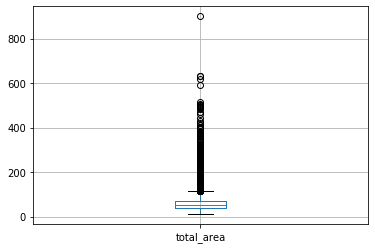

In [16]:
data.boxplot('total_area')
plt.show()

Построим диаграмму размаха для столбца с площадями квартир. Видим, что есть выбросы до более 800 кв.м, так же заметно, что значений становится меньше при площади больше 400 кв.м.

Ограничим значения площади, построим повторно диаграмму размаха.

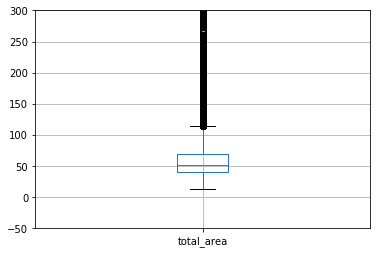

In [17]:
plt.ylim(-50, 300)
data.boxplot('total_area')
plt.show()

Из данной диаграммы размаха видно, что самое большое количество квартир (между 1 и 3 квартилями) имеют площадь от 30 до 70 кв.м, при этом медиана составляет 50 кв.м.

Построим гистограмму по площадям квартир для наглядного представления количества квартир каждой площади.

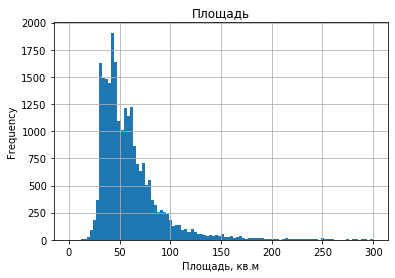

In [18]:
plt.xlabel('Площадь, кв.м')
data['total_area'].plot(kind='hist', bins=100, range=(0, 300), grid=True, title='Площадь')
plt.show()

Больше всего квартир с площадью от 30 до 50 кв.м. Меньше 25 кв.м квартир почти нет, а больше 75 кв.м количество квартир стремительно падает. Единичные случаи квартир большой площади встречаются вплоть до 300 кв.м.

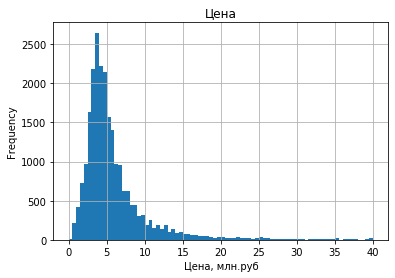

In [19]:
plt.xlabel('Цена, млн.руб')
data['last_price'].plot(kind='hist', bins=80, range=(0, 40),grid=True, title='Цена')
plt.show()

Больше всего квартир в пределах 3-5 млн.руб. В целом распределение соответствует распределению квартир по площадям. Можно предположить, что у площади и цены будет высокий коэффициент корреляции.

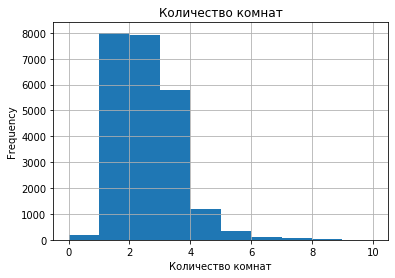

In [20]:
plt.xlabel('Количество комнат')
data['rooms'].plot(kind='hist', bins=10, range=(0, 10), grid=True, title='Количество комнат')
plt.show()

Больше всего однокомнатных и двухкомнатных квартир, что соответствует распределению площадей с пиком в 30-50 кв.м.

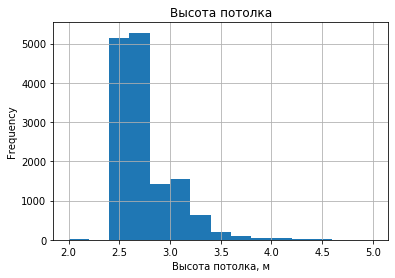

In [21]:
plt.xlabel('Высота потолка, м')
data['ceiling_height'].plot(kind='hist', bins=15, range=(2, 5), grid=True, title='Высота потолка')
plt.show()

Высота потолков в пике соответствует типичной высоте в жилых домах в спальных районах, что составляет 2,5-2,7 м. Ожидаемо, что в таких районах больше всего предложений о продажах квартир. Данные по высоте потолков представлены для чуть меньше 60% объявлений.

### Время продажи квартиры

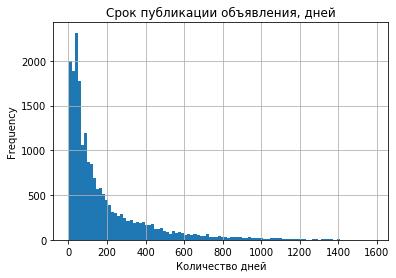

In [22]:
plt.xlabel('Количество дней')
data['days_exposition'].plot(kind='hist', bins=100, grid=True, title='Срок публикации объявления, дней')
plt.show()

Видно, что в большинстве своём квартиры продаются до 200 дней, от 200 до 600 продаются почти все оставшиеся, но существуют и те которые продаются больше 600, вплоть до 1400 дней. Построим ещё одну гистограмму для более наглядного распределения быстро продающихся квартир, где ограничим время продажи до 210 дней и поделим данные на 30 корзин (по 1 неделе).

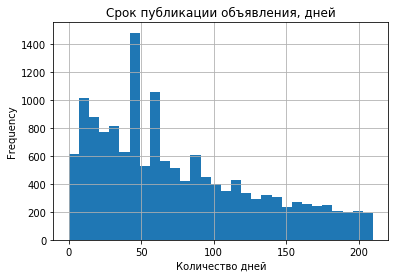

In [23]:
plt.xlabel('Количество дней')
data['days_exposition'].plot(kind='hist', bins=30, range=(0,210), grid=True, title='Срок публикации объявления, дней')
plt.show()

Из графика видно, что время распределено почти линейно, больше всего квартир продается меньше чем за 100 дней.

Посчитаем среднее и медианное время продажи квартиры.

In [24]:
print('Среднее время продажи {:.0f} дней'.format(data['days_exposition'].mean()))
print('Медианное время продажи {:.0f} дней'.format(data['days_exposition'].median()))

Среднее время продажи 181 дней
Медианное время продажи 95 дней


В данном случае медианное время сильно отличается от среднего, потому что в данных присутствуют единичные выбросы со временем продажи до 1400 дней, и они сильно влияют на среднее значение. Медианное значение больше подходит для оценки, что подтверждается визуальной оценкой гистограммы.

Одна неделя - маленький срок для продажи квартиры, однако таких продаж достаточно много. Возможно, некоторые объявления снимаются с публикации без факта продажи квартиры. 

Квартиры, которые продаются больше года можно назвать долго продающимися. Скорее всего, в таком случае у людей нет спешки, но есть желание выгодно продать, тогда квартиру выставляют за цену выше среднего и дольше ждут покупателя.

Уберем выбивающиеся данные:
1. Когда квартира продавалась больше 2 лет
2. Квартиры стоимостью больше 60 млн. руб
3. Квартиры площадью больше 300 кв.м
4. Квартиры с количеством комнат больше 7
5. Квартиры со стоимостью одного квадратного метра больше 300 тыс. руб

Такие значения достаточно редкие и сильно выбиваются из общей картины.

Опытным путём установлено, что после отсеивания выбивающихся значений коэффициенты корреляции величин в последующих действиях выросли. Это означает, что экстраординарные квартиры портят общую статистику по рынку, такие квартиры требуют отдельного анализа в срезе данных с элитными квартирами, когда у всех квартир большие площади и большие стоимости.

In [25]:
data = data.query('days_exposition < 730 and last_price < 60 and total_area < 300 and rooms <8 and price_per_sq_meter < 300')

## Факторы, влияющи на стоимость квартиры

Изучим зависимость стоимости квартиры от площади, числа комнат, удалённости от центра, этажа, даты размещения объявления.

### Площадь

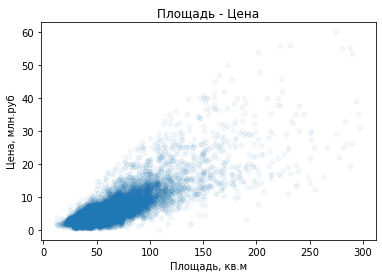

Корреляция площади квартиры и цены равна 0.80


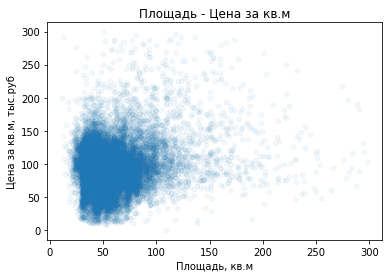

Корреляция площади квартиры и цены за квадратный метр равна 0.17


In [26]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05, title='Площадь - Цена')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция площади квартиры и цены равна {:.2f}'.format(data['total_area'].corr(data['last_price'])))

data.plot(x='total_area', y='price_per_sq_meter', kind='scatter', alpha=0.05, title='Площадь - Цена за кв.м')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция площади квартиры и цены за квадратный метр равна {:.2f}'.format(data['total_area'].corr(data['price_per_sq_meter'])))

Из диаграммы видно, что цена почти линейно зависит от площади, что подтверждает достаточно высокий коэффициент корреляции данных величин. Диаграмма выглядит не линией, а облаком примерно равной толщины, это значит, что на рынке присутствуют квартиры разного класса, они будут отражены линиями параллельными медиане, проведенными через облако значений.

Зависимость цены квадратного метра от площади квартиры не наблюдается, однако разброс в ценах за квадратный метр значительно уменьшается при приближении площади квартиры к 100 кв.м

### Количесвто комнат

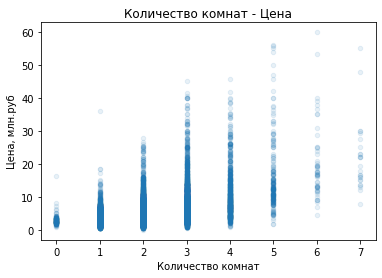

Корреляция количесва комнат и цены равна 0.51


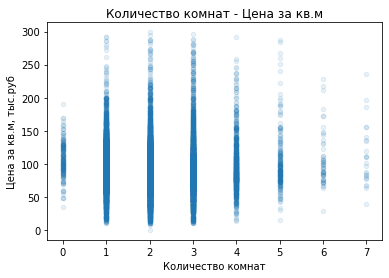

Корреляция количесва комнат и цены за квадратный метр равна -0.06


In [27]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, title='Количество комнат - Цена')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция количесва комнат и цены равна {:.2f}'.format(data['rooms'].corr(data['last_price'])))

data.plot(x='rooms', y='price_per_sq_meter', kind='scatter', alpha=0.1, title='Количество комнат - Цена за кв.м')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция количесва комнат и цены за квадратный метр равна {:.2f}'.format(data['rooms'].corr(data['price_per_sq_meter'])))

Зависимость цены от количества комнат слабее, чем от площади, хотя всё равно сохраняется, ведь зависимость площади от числа комнат достаточно высокая. А вот стоимость квадратного метра с количесвтом комнат не связана

### Удалённость от центра города

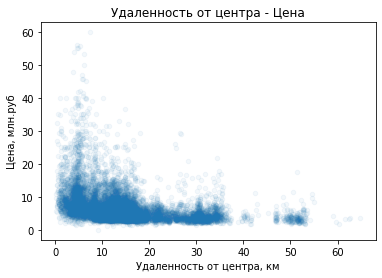

Корреляция удаленности от центра и цены равна -0.33


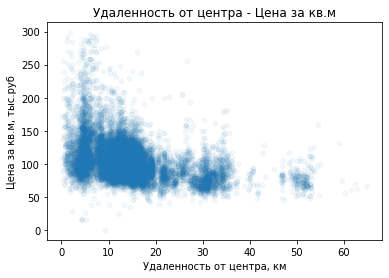

Корреляция удаленности от центра и цены за квадратный метр равна -0.40


In [28]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.05, title='Удаленность от центра - Цена')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция удаленности от центра и цены равна {:.2f}'.format(data['cityCenters_nearest'].corr(data['last_price'])))

data.plot(x='cityCenters_nearest', y='price_per_sq_meter', kind='scatter', alpha=0.05, title='Удаленность от центра - Цена за кв.м')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция удаленности от центра и цены за квадратный метр равна {:.2f}'.format(data['cityCenters_nearest'].corr(data['price_per_sq_meter'])))

Стоимость квартиры не сильно зависит от расстояния до центра города, что подтверждается достаточно низким коэффициентом корреляции. А вот цена за квадратный метр падает по мере удаления от центра города.

Так же можно заметить следующие особенности:
1. Самые дорогие квартиры расположены в пределах 10км от центра.
2. Минимальная стоимость квартир самая высокая в радиусе меньше 7-8 км от центра.
3. В радиусе 10-20км самая большая плотность квартир средней ценовой категории.
4. В радиусе больше 20км (за пределами города) квартир значительно меньше и самая высокая цена за квартиру в 2 раза ниже чем в спальных районах города (радиус 10-20км)

### Этаж

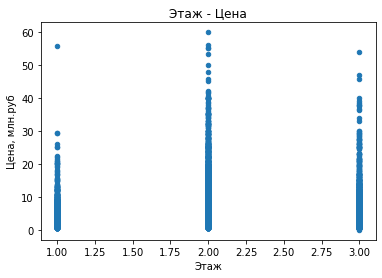

Корреляция этажа и цены равна 0.06


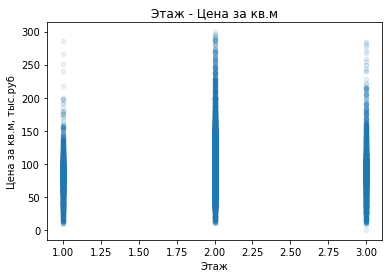

Корреляция этажа и цены за квадратный метр равна 0.05


In [29]:
def floor_num(row):
    floor_number = row['floor']
    total_floors = row['floors_total']
    if floor_number == total_floors:
        return 3
    if floor_number == 1:
        return 1
    return 2
data['floor_group_num'] = data.apply(floor_num, axis=1)

data.plot('floor_group_num', 'last_price', kind='scatter', title='Этаж - Цена')
plt.xlabel('Этаж')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция этажа и цены равна {:.2f}'.format(data['floor_group_num'].corr(data['last_price'])))

data.plot(x='floor_group_num', y='price_per_sq_meter', kind='scatter', alpha=0.1, title='Этаж - Цена за кв.м')
plt.xlabel('Этаж')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция этажа и цены за квадратный метр равна {:.2f}'.format(data['floor_group_num'].corr(data['price_per_sq_meter'])))

Присвоим номера группам этажей: 1 - Первый, 2 - Другой, 3 - Последний

Видно, что стоимость квартиры не зависит от этажа. Хотя количесвто дорогих квартир на последнем этаже явно больше, чем на первом.

### День недели публикации объявления

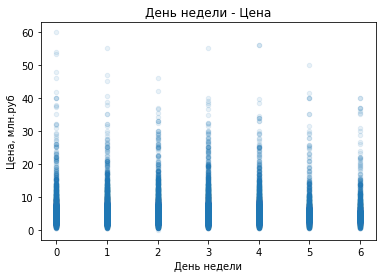

Корреляция дня недели и цены равна -0.01


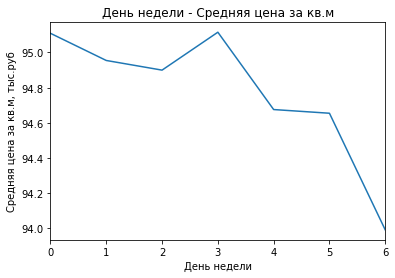

In [30]:
data.plot(x='day', y='last_price', kind='scatter', alpha=0.1, title='День недели - Цена')
plt.xlabel('День недели')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция дня недели и цены равна {:.2f}'.format(data['day'].corr(data['last_price'])))

data_day_mean = data.pivot_table(index='day', values='price_per_sq_meter', aggfunc='mean')
data_day_mean.columns = ['mean_price_per_sq_meter']
data_day_mean.plot(title='День недели - Средняя цена за кв.м', legend=False)
plt.xlabel('День недели')
plt.ylabel('Средняя цена за кв.м, тыс.руб')
plt.show()

Цена и день недели, в который было опубликовано объявление нулевую корреляцию, однако самая высокая средняя стоимость у квартир, объявление о продаже которых опублековано в понедельник и четверг, а чем ближе к концу недели, тем ниже средняя цена. 

### Месяц публикации объявления

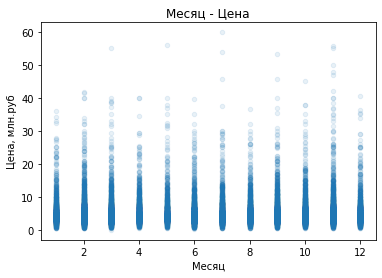

Корреляция месяца и цены равна 0.01


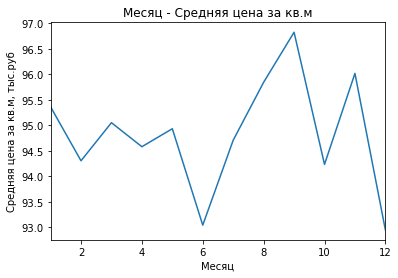

In [31]:
data.plot(x='month', y='last_price', kind='scatter', alpha=0.1, title='Месяц - Цена')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция месяца и цены равна {:.2f}'.format(data['month'].corr(data['last_price'])))

data_month_mean = data.pivot_table(index='month', values='price_per_sq_meter', aggfunc='mean')
data_month_mean.columns = ['mean_price_per_sq_meter']
data_month_mean.plot(title='Месяц - Средняя цена за кв.м', legend=False)
plt.xlabel('Месяц')
plt.ylabel('Средняя цена за кв.м, тыс.руб')
plt.show()

Цена и месяц, в который было опубликовано объявление не имеют корреляции. Если наблюдать зависимость средней цены, то можно заметить, что на фоне всех месяцев сильно выбивается осень (сентябрь-ноябрь), в этот период самая высокая средняя цена квартир.

### Год публикации объявления

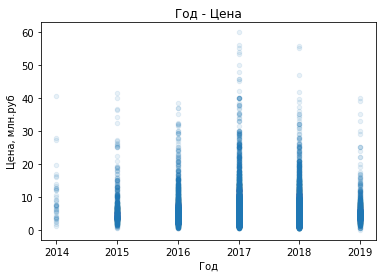

Корреляция года и цены равна -0.05


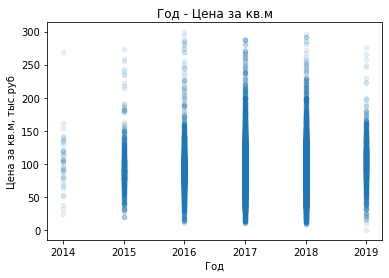

Корреляция года и цены за квадратный метр равна 0.04


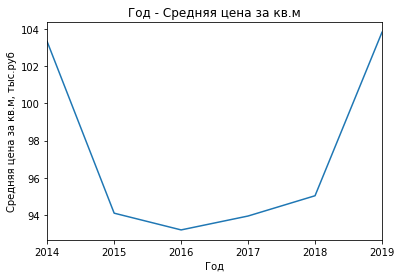

In [32]:
data.plot(x='year', y='last_price', kind='scatter', alpha=0.1, title='Год - Цена')
plt.xlabel('Год')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция года и цены равна {:.2f}'.format(data['year'].corr(data['last_price'])))

data.plot(x='year', y='price_per_sq_meter', kind='scatter', alpha=0.1, title='Год - Цена за кв.м')
plt.xlabel('Год')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция года и цены за квадратный метр равна {:.2f}'.format(data['year'].corr(data['price_per_sq_meter'])))

data_year_mean = data.pivot_table(index='year', values='price_per_sq_meter', aggfunc='mean')
data_year_mean.columns = ['mean_price_per_sq_meter']
data_year_mean.plot(title='Год - Средняя цена за кв.м', legend=False)
plt.xlabel('Год')
plt.ylabel('Средняя цена за кв.м, тыс.руб')
plt.show()

Удивительно, но корреляция в данном случае нулевая. А как же инфляция? Видимо очень большое разнообразие квартир и цен. Если обратить внимание на график средней стоимости квартир по годам, то видно, что самая высокая стоимость была в 2014 и в 2019 годах, что отчетливо отражает кризис 2014 года, восстановление экономики после него и постепенную инфляцию в последующие года.

### Населенный пункт

Создадим таблицу с количеством квартир и средней стоимостью квадратного мтера в 10 населенных пунктах с наибольшим количеством квартир.

In [33]:
locality_data = data.pivot_table(index='locality_name', values='price_per_sq_meter', aggfunc=['count', 'mean', 'median'])
locality_data.columns = ['count', 'mean', 'median']
locality_data = locality_data.sort_values('count', ascending=False).head(10)
locality_data['mean'] = locality_data['mean'].astype(int)
locality_data['median'] = locality_data['median'].astype(int)
locality_data = locality_data.sort_values('median', ascending=False)

In [34]:
locality_data

,count,mean,median
locality_name,,,
Санкт-Петербург,12896,108,102
Пушкин,290,101,97
посёлок Парголово,295,88,91
деревня Кудрово,280,92,91
посёлок Мурино,497,85,86
посёлок Шушары,396,77,76
Колпино,301,74,73
Гатчина,254,67,67
Всеволожск,326,66,65


В Санкт-Петербурге и Пушкине средняя стоимость квадратного метра на 4-6 тыс. руб превышает медианную из-за наличия элитного жилья в этих населенных пунктах, поэтому разумнее ориентироваться на медианную стоимость.

Самая высокая стоимость жилья в Санкт-Петербурге и Пушкине, а самая низкая в Выборге, Всеволожске и Гатчине из-за удаленности от Санкт-Петербурга и отсутствия удобного транспортного сообщения с ним. 

## Оценка стоимости квадратного метра площади в Санкт-Петербурге в зависимости от расстояния до центра города

Создадим новый датафрейм, содержащий только данные по Санкт-Петербургу, и не имеющий пропусков в столбце "Расстояние до центра города"

In [35]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data = spb_data.dropna(subset=['cityCenters_nearest'])
print(spb_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12874 entries, 2 to 23697
Data columns (total 30 columns):
total_images             12874 non-null int64
last_price               12874 non-null float64
total_area               12874 non-null float64
first_day_exposition     12874 non-null datetime64[ns]
rooms                    12874 non-null int64
ceiling_height           7951 non-null float64
floors_total             12874 non-null int64
living_area              11948 non-null float64
floor                    12874 non-null int64
is_apartment             12874 non-null bool
studio                   12874 non-null bool
open_plan                12874 non-null bool
kitchen_area             11745 non-null float64
balcony                  12874 non-null int64
locality_name            12874 non-null object
airports_nearest         12855 non-null float64
cityCenters_nearest      12874 non-null float64
parks_around3000         12874 non-null int64
parks_nearest            5791 non-null floa

Округлим расстояние до центра города до целых километров

In [36]:
spb_data['cityCenters_nearest'] = spb_data['cityCenters_nearest'].astype(int)

Сгруппируем данные по расстоянию до центра города и создадим столбец со средней ценой за кв.м для каждого километра

In [37]:
spb_data_km = ( spb_data
               .pivot_table(index='cityCenters_nearest', values='price_per_sq_meter', aggfunc='mean')
               .sort_values('cityCenters_nearest', ascending=True)
              )
spb_data_km['price_per_sq_meter'] = spb_data_km['price_per_sq_meter'].astype(int)
print(spb_data_km)

                     price_per_sq_meter
cityCenters_nearest                    
0                                   134
1                                   129
2                                   119
3                                   114
4                                   129
5                                   130
6                                   129
7                                   127
8                                   116
9                                   107
10                                  108
11                                  104
12                                  106
13                                  105
14                                  102
15                                   99
16                                   98
17                                   94
18                                   93
19                                   96
20                                  102
21                                   90
22                                   86


Построим график зависимости цены за кв.м от расстояния до центра города

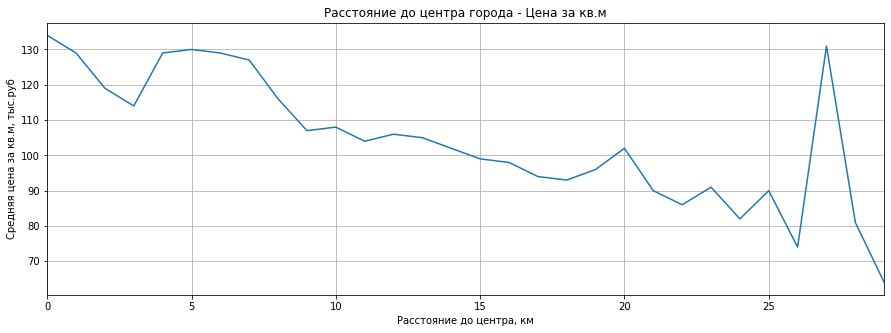

In [38]:
spb_data_km.plot(figsize=(15,5),grid=True, title='Расстояние до центра города - Цена за кв.м', legend=False)
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за кв.м, тыс.руб')
plt.show()

В самом центре квартиры самые дорогие, по мере удаления, в пределах 1-3км, они дешевеют, а проходя границу в 4км делают резкий скачок обратно вверх, потому что добавляются квартиры в спальных зонах, максимально близких к центру города. Таким образом, примем за "центральную" зону радиусом 3км от центра города.

# Анализ центральной зоны Санкт-Петербурга

Создадим датафрейм с данными для центральной зоны Санкт-Петербурга

In [39]:
spb_center_data = spb_data.query('cityCenters_nearest <= 3')

Проанализируем следующие данные: площадь, цена, число комнат, высота потолков

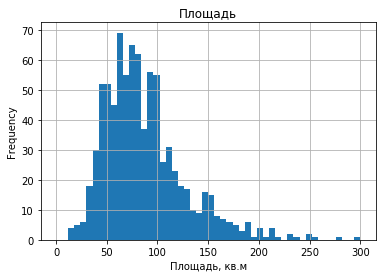

In [40]:
spb_center_data['total_area'].plot(kind='hist', bins=50, range=(0, 300), grid=True, title='Площадь')
plt.xlabel('Площадь, кв.м')
plt.show()

В отличие от города в целом, где ольше всего квартир с площадью от 30 до 50 кв.м, в центре города основная масса квартир имеет площадь от 50 до 100 кв.м, что в 2 раза больше, чем в городе в целом.Больше 75 кв.м количество квартир стремительно падает. Единичные случаи квартир большой площади встречаются вплоть до 300 кв.м.

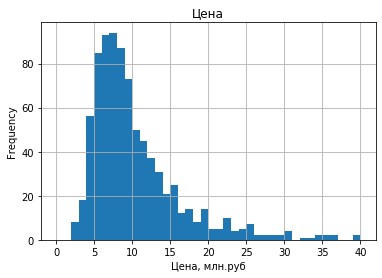

In [41]:
spb_center_data['last_price'].plot(kind='hist', bins=40, range=(0, 40), grid=True, title='Цена')
plt.xlabel('Цена, млн.руб')
plt.show()

Больше всего квартир в пределах 5-10 млн. руб, что значительно больше, чем среднее по всем данным, где основная масса приходится на 3-5 млн.руб.

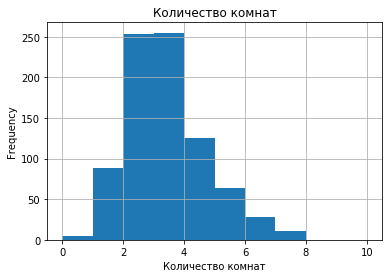

In [42]:
spb_center_data['rooms'].plot(kind='hist', bins=10, range=(0, 10), grid=True, title='Количество комнат')
plt.xlabel('Количество комнат')
plt.show()

В отличие от общих данных, в центре очень мало однакомнатных квартир. Больше всего двухкомнатных и трёхкомнатных квартир, что похоже на данные для всего Санкт-Петербурга. Средняя площадь одной комнаты в центре города явно больше, потому что при похжем распределении квартир по количеству комнат, средняя площадь превосходит в 2 раза.

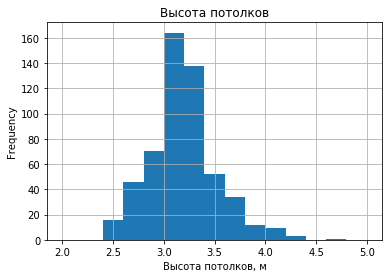

In [43]:
spb_center_data['ceiling_height'].plot(kind='hist', bins=15, range=(2, 5), grid=True, title='Высота потолков')
plt.xlabel('Высота потолков, м')
plt.show()

Высота потолков в центре Санкт-Петербурга значительно выше. Мало квартир с потолками меньше 3м, большинство квартир имеет высоту потолков 3-3,4м

## Факторы, влияющи на стоимость квартиры

Изучим зависимость стоимости квартиры в центре Санкт-Петербурга от площади, числа комнат, удалённости от центра, этажа, даты размещения объявления.

### Площадь

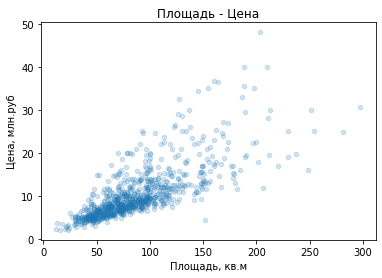

Корреляция площади квартиры и цены равна 0.75


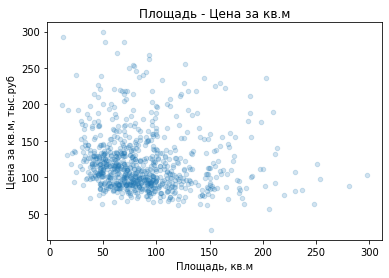

Корреляция площади квартиры и цены за квадратный метр равна -0.11


In [44]:
spb_center_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2, title='Площадь - Цена')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция площади квартиры и цены равна {:.2f}'.format(spb_center_data['total_area'].corr(spb_center_data['last_price'])))

spb_center_data.plot(x='total_area', y='price_per_sq_meter', kind='scatter', alpha=0.2, title='Площадь - Цена за кв.м')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция площади квартиры и цены за квадратный метр равна {:.2f}'.format(spb_center_data['total_area'].corr(spb_center_data['price_per_sq_meter'])))

Из диаграммы видно, что цена квартиры зависит от площади так же, как и для всего города в целом.

Зависимость цены квадратного метра от площади квартиры не наблюдается, в отличие от города в целом, в центре цена за кв.м не стабилизируется с увеличением площади квартиры

### Количество комнат

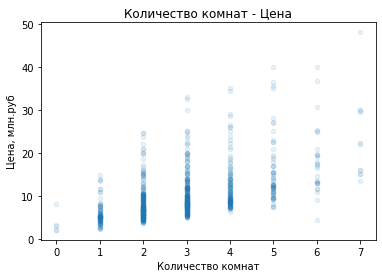

Корреляция количесва комнат и цены равна 0.55


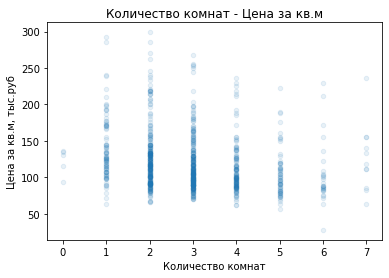

Корреляция количесва комнат и цены за квадратный метр равна -0.20


In [45]:
spb_center_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, title='Количество комнат - Цена')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция количесва комнат и цены равна {:.2f}'.format(spb_center_data['rooms'].corr(spb_center_data['last_price'])))

spb_center_data.plot(x='rooms', y='price_per_sq_meter', kind='scatter', alpha=0.1, title='Количество комнат - Цена за кв.м')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция количесва комнат и цены за квадратный метр равна {:.2f}'.format(spb_center_data['rooms'].corr(spb_center_data['price_per_sq_meter'])))

Зависимость цены от количества комнат слабее, чем от площади, но равно сохраняется, как и в городе в целом. А вот стоимость квадратного метра с увеличением количества комнат немного уменьшается, в отличие от Санкт-Петербурга в целом, где корреляция данных величин практически нулевая

### Удаленность от центра города

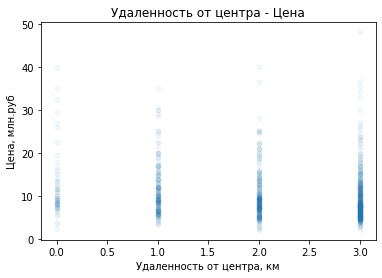

Корреляция удаленности от центра и цены равна -0.14


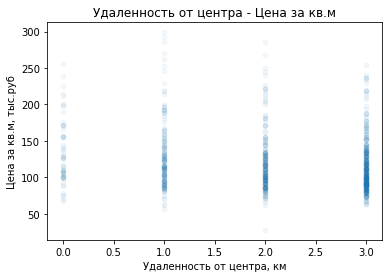

Корреляция удаленности от центра и цены за квадратный метр равна -0.17


In [46]:
spb_center_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.05, title='Удаленность от центра - Цена')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция удаленности от центра и цены равна {:.2f}'.format(spb_center_data['cityCenters_nearest'].corr(spb_center_data['last_price'])))

spb_center_data.plot(x='cityCenters_nearest', y='price_per_sq_meter', kind='scatter', alpha=0.05, title='Удаленность от центра - Цена за кв.м')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция удаленности от центра и цены за квадратный метр равна {:.2f}'.format(spb_center_data['cityCenters_nearest'].corr(spb_center_data['price_per_sq_meter'])))

Стоимость квартиры и цена квадратного метра незначительно падают, по мере удаления от центра города, но корреляция данных величин значительно меньше, чем для города в целом.

### Этаж

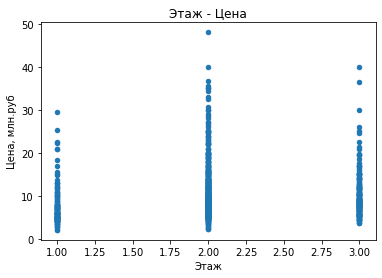

Корреляция этажа и цены равна 0.09


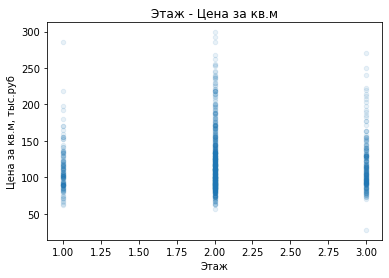

Корреляция этажа и цены за квадратный метр равна 0.03


In [47]:
spb_center_data['floor_group_num'] = spb_center_data.apply(floor_num, axis=1)

spb_center_data.plot('floor_group_num', 'last_price', kind='scatter', title='Этаж - Цена')
plt.xlabel('Этаж')
plt.ylabel('Цена, млн.руб')
plt.show()
print('Корреляция этажа и цены равна {:.2f}'.format(spb_center_data['floor_group_num'].corr(spb_center_data['last_price'])))

spb_center_data.plot(x='floor_group_num', y='price_per_sq_meter', kind='scatter', alpha=0.1, title='Этаж - Цена за кв.м')
plt.xlabel('Этаж')
plt.ylabel('Цена за кв.м, тыс.руб')
plt.show()
print('Корреляция этажа и цены за квадратный метр равна {:.2f}'.format(spb_center_data['floor_group_num'].corr(spb_center_data['price_per_sq_meter'])))

Присвоим номера группам этажей: 1 - Первый, 2 - Другой, 3 - Последний

Видно, что стоимость квартиры не зависит от этажа.

### День публикации объявления

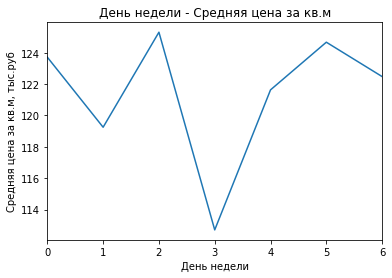

In [49]:
spb_center_data_day_mean = spb_center_data.pivot_table(index='day', values='price_per_sq_meter', aggfunc='mean')
spb_center_data_day_mean.columns = ['mean_price_per_sq_meter']
spb_center_data_day_mean.plot(title='День недели - Средняя цена за кв.м', legend=False)
plt.xlabel('День недели')
plt.ylabel('Средняя цена за кв.м, тыс.руб')
plt.show()

Зависимотсь цены и деня недели, в который было опубликовано объявление, отличается от данных для города в целом, для центра никаких тенденций не наблюдается

### Месяц публикации объявления

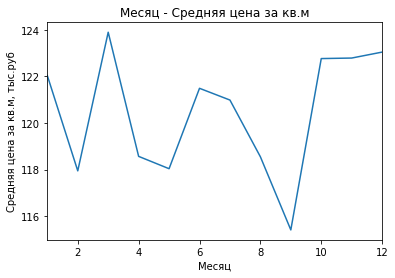

In [50]:
spb_center_data_day_mean = spb_center_data.pivot_table(index='month', values='price_per_sq_meter', aggfunc='mean')
spb_center_data_day_mean.columns = ['mean_price_per_sq_meter']
spb_center_data_day_mean.plot(title='Месяц - Средняя цена за кв.м', legend=False)
plt.xlabel('Месяц')
plt.ylabel('Средняя цена за кв.м, тыс.руб')
plt.show()

Цена и месяц, в который было опубликовано объявление не имеют никакой видимой зависимотси

### Год публикации объявления

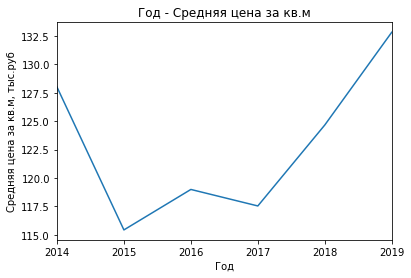

In [51]:
spb_center_data_day_mean = spb_center_data.pivot_table(index='year', values='price_per_sq_meter', aggfunc='mean')
spb_center_data_day_mean.columns = ['mean_price_per_sq_meter']
spb_center_data_day_mean.plot(title='Год - Средняя цена за кв.м', legend=False)
plt.xlabel('Год')
plt.ylabel('Средняя цена за кв.м, тыс.руб')
plt.show()

Данная зависимотсть соответствует зависимотси, полученной ранее для рынка недвижимотси в целом.

## Вывод

В центре Санкт-Петербурга квартиры больше по площади, имеют больше комнат, дороже стоят, но подчиняются тем же зависимостям, что и все остальные квартиры. Отличие только в удаленности от центра, эта величина меньше влияет на стоимость квартир, расположенных в центральной зоне.

## 5. Общий вывод

Был проведен анализ рынка недвижимости, были выполнены поставленные задачи.

Для квартир была расчитана средняя стоимость квадратного метра и были построены зависимости её от различных параметров.

Анализ проводился для рынка недвижимости в целом и для центра Санкт-Петербурга в отдельности